# Data Pre Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## The Dataset

In [2]:
df = pd.read_csv('archive/TrafficTwoMonth.csv')
print(df.shape)
df.head()

(5952, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
columns = list(df.columns)
columns

['Time',
 'Date',
 'Day of the week',
 'CarCount',
 'BikeCount',
 'BusCount',
 'TruckCount',
 'Total',
 'Traffic Situation']

### Total Number of vehicles with Traffic Situation 

<Axes: title={'center': 'Average number of vehicles in different traffic situations'}, xlabel='Traffic Situation', ylabel='Total number of vehicles'>

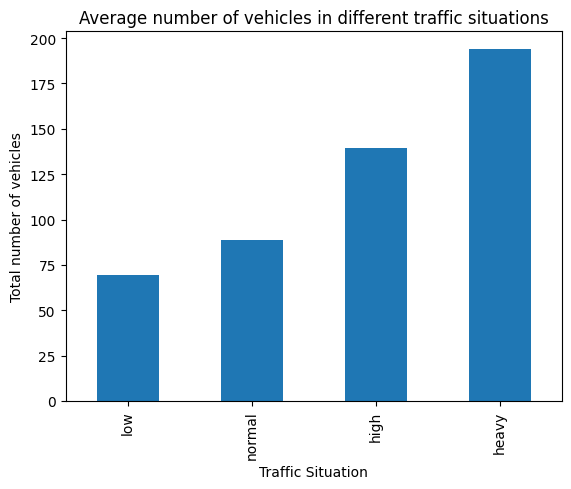

In [4]:
df.groupby('Traffic Situation')['Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Total number of vehicles', title='Average number of vehicles in different traffic situations')

## About the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


## Values for feature "Day of the week"

In [6]:
Days = list(df['Day of the week'].unique())
print(Days)
print(len(Days))

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
7


## How many instances for each day

In [7]:
day_counts = df['Day of the week'].value_counts()

day_counts_df = day_counts.reset_index()
day_counts_df.columns = ['Day of the week', 'Number of Data Points']

desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts_df = day_counts_df.set_index('Day of the week').reindex(desired_order).reset_index()

day_counts_df['Number of Data Points'] = day_counts_df['Number of Data Points'].fillna(0).astype(int)

print(day_counts_df)


  Day of the week  Number of Data Points
0          Monday                    768
1         Tuesday                    960
2       Wednesday                    960
3        Thursday                    960
4          Friday                    768
5        Saturday                    768
6          Sunday                    768


## Make simulation dataset1

In [8]:
# # print(df.loc[4319, 'Day of the week'])

# # df1 = df.copy()
# # print(df1.shape)

# df1 = pd.read_csv('archive/MLdata2.csv')

# start_index = 576
# end_index = 1247

# df2 = df1.iloc[start_index:end_index + 1].copy()
# df2 = df2.reset_index(drop=True)
# print(df2.shape)
# df1 = df1.drop(df.index[start_index:end_index + 1])
# df1 = df1.reset_index(drop=True)

# df2.to_csv('archive/SimulationData3.csv', index=False)
# df1.to_csv('archive/MLdata.csv', index=False)



### Check if simulation data are okay

In [9]:
df0 = pd.read_csv('archive/MLdata.csv')
df1 = pd.read_csv('archive/SimulationData1.csv')
df2 = pd.read_csv('archive/SimulationData2.csv')
df3 = pd.read_csv('archive/SimulationData3.csv')

day_counts0 = df0['Day of the week'].value_counts()
day_counts1 = df1['Day of the week'].value_counts()
day_counts2 = df2['Day of the week'].value_counts()
day_counts3 = df3['Day of the week'].value_counts()

day_counts_df0 = day_counts0.reset_index()
day_counts_df1 = day_counts1.reset_index()
day_counts_df2 = day_counts2.reset_index()
day_counts_df3 = day_counts3.reset_index()

day_counts_df0.columns = ['Day of the week', 'Number of Data Points']
day_counts_df1.columns = ['Day of the week', 'Number of Data Points']
day_counts_df2.columns = ['Day of the week', 'Number of Data Points']
day_counts_df3.columns = ['Day of the week', 'Number of Data Points']

desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts_df0 = day_counts_df0.set_index('Day of the week').reindex(desired_order).reset_index()
day_counts_df1 = day_counts_df1.set_index('Day of the week').reindex(desired_order).reset_index()
day_counts_df2 = day_counts_df2.set_index('Day of the week').reindex(desired_order).reset_index()
day_counts_df3 = day_counts_df3.set_index('Day of the week').reindex(desired_order).reset_index()

day_counts_df0['Number of Data Points'] = day_counts_df0['Number of Data Points'].fillna(0).astype(int)
day_counts_df1['Number of Data Points'] = day_counts_df1['Number of Data Points'].fillna(0).astype(int)
day_counts_df2['Number of Data Points'] = day_counts_df2['Number of Data Points'].fillna(0).astype(int)
day_counts_df3['Number of Data Points'] = day_counts_df3['Number of Data Points'].fillna(0).astype(int)

print(day_counts_df0)
print(day_counts_df1)
print(day_counts_df2)
print(day_counts_df3)

  Day of the week  Number of Data Points
0          Monday                    480
1         Tuesday                    672
2       Wednesday                    672
3        Thursday                    672
4          Friday                    480
5        Saturday                    480
6          Sunday                    480
  Day of the week  Number of Data Points
0          Monday                     96
1         Tuesday                     96
2       Wednesday                     96
3        Thursday                     96
4          Friday                     96
5        Saturday                     96
6          Sunday                     96
  Day of the week  Number of Data Points
0          Monday                     96
1         Tuesday                     96
2       Wednesday                     96
3        Thursday                     96
4          Friday                     96
5        Saturday                     96
6          Sunday                     96
  Day of the wee

# Load the new data set

In [10]:
df = pd.read_csv('archive/MLdata.csv')
print(df.shape)
df.head()

(3936, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


## Values for feature "Time"

In [11]:
Times = list(df['Time'].unique())
print(Times)
print(len(Times))

['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM', '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM', '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM', '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM', '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM', '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM', '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM', '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM', '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM', '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM', '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM', '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM', '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM', '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM', '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM', '3:00:00 PM', '3:15:00 PM', '3:30:00 PM', '3:45:00 PM', '4:00:00 PM', '4:15:00 PM', '4:30:00 PM', '4:45:00 PM', '5:00:00 PM', '5:15:00 PM', '5:

## Get the features only needed for the model

In [12]:
df.drop(columns=['Date'], inplace=True)

df.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,Tuesday,11,2,1,34,48,normal


## About dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               3936 non-null   object
 1   Day of the week    3936 non-null   object
 2   CarCount           3936 non-null   int64 
 3   BikeCount          3936 non-null   int64 
 4   BusCount           3936 non-null   int64 
 5   TruckCount         3936 non-null   int64 
 6   Total              3936 non-null   int64 
 7   Traffic Situation  3936 non-null   object
dtypes: int64(5), object(3)
memory usage: 246.1+ KB


### Total Number of vehicles with Time of the Day

<Axes: title={'center': 'Total number of vehicles with time of the day'}, xlabel='Time of the day', ylabel='Total number of vehicles'>

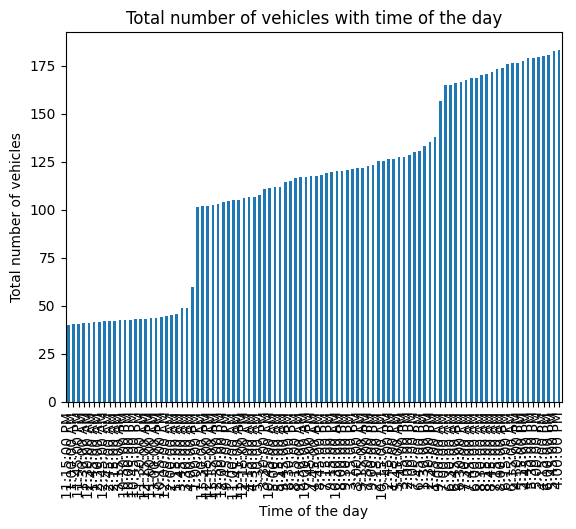

In [14]:
df.groupby('Time')['Total'].mean().sort_values(ascending=True).plot.bar(xlabel='Time of the day', ylabel='Total number of vehicles', title='Total number of vehicles with time of the day')

### Values for "Traffic Situation"

In [15]:
Trafficsituations = list(df['Traffic Situation'].unique())
print(Trafficsituations)
print(len(Trafficsituations))

['normal', 'low', 'heavy', 'high']
4


## Find Outliers

### Car Count

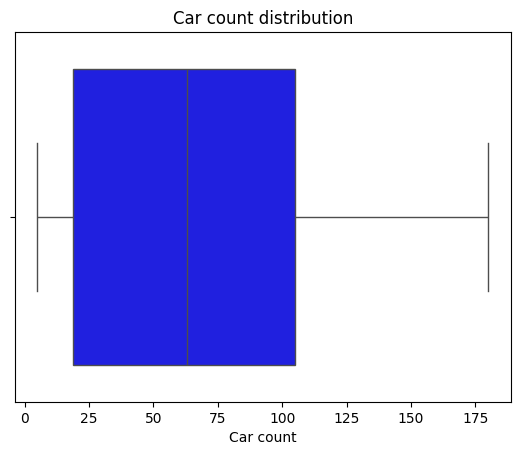

In [16]:
sns.boxplot(x=df['CarCount'], color='blue')  
plt.xlabel('Car count')
plt.title('Car count distribution')
plt.show()

### Bike Count

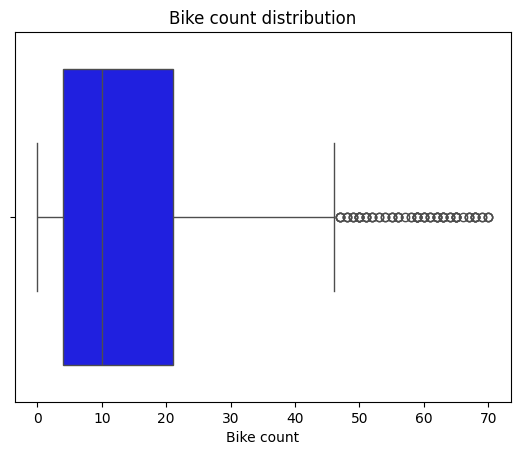

In [17]:
sns.boxplot(x=df['BikeCount'], color='blue')  
plt.xlabel('Bike count')
plt.title('Bike count distribution')
plt.show()


### Bus Count

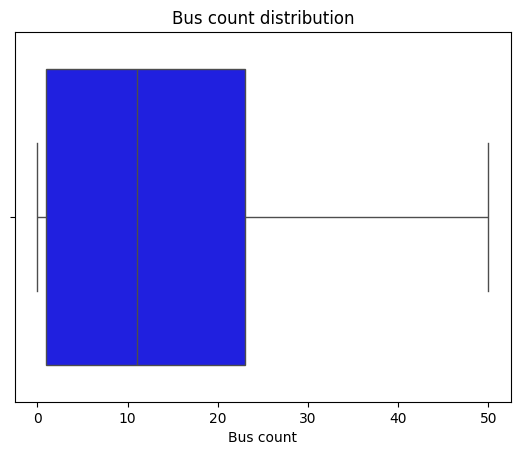

In [18]:
sns.boxplot(x=df['BusCount'], color='blue')  
plt.xlabel('Bus count')
plt.title('Bus count distribution')
plt.show()

### Truck Count

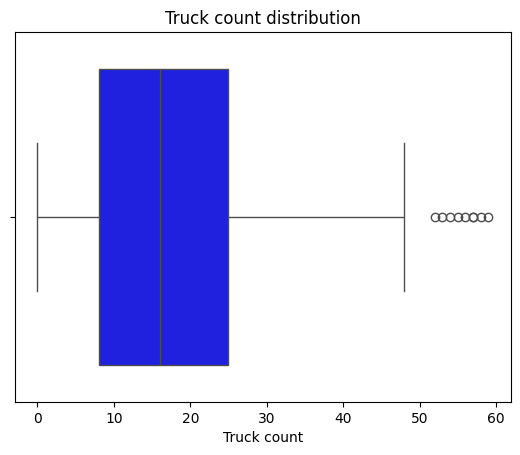

In [19]:
sns.boxplot(x=df['TruckCount'], color='blue')  
plt.xlabel('Truck count')
plt.title('Truck count distribution')
plt.show()

### Total vehicle count

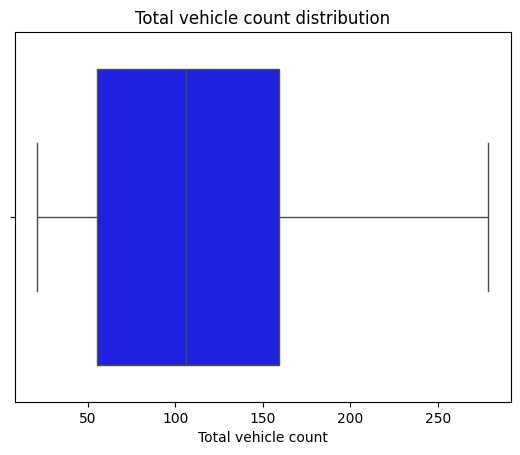

In [20]:
sns.boxplot(x=df['Total'], color='blue')  
plt.xlabel('Total vehicle count')
plt.title('Total vehicle count distribution')
plt.show()

### Total Number of vehicles with Day of the Weak

<Axes: title={'center': 'Average number of vehicles in days of the week'}, xlabel='Day of the week', ylabel='Average number of vehicles'>

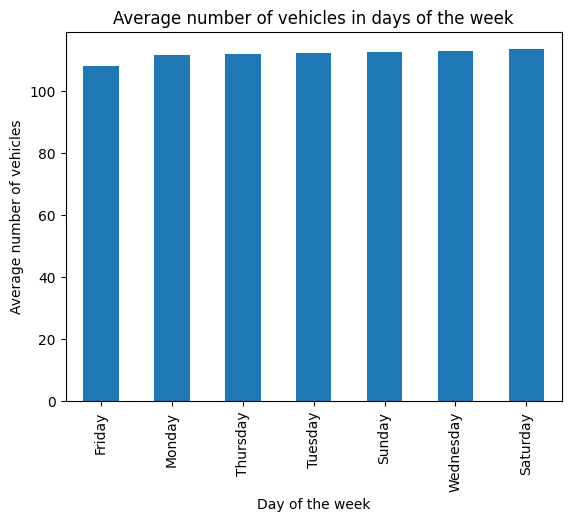

In [21]:
df.groupby('Day of the week')['Total'].mean().sort_values(ascending=True).plot.bar( ylabel='Average number of vehicles', title='Average number of vehicles in days of the week')

## Correlation

### Convet features to integer for correlation mapping

In [22]:
corr_data = df.copy()
corr_data.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,Tuesday,11,2,1,34,48,normal


In [23]:
# Create a mapping for time intervals
time_mapping = {time: idx for idx, time in enumerate(corr_data['Time'].unique())}

# Create a mapping for days of the week
#day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
day_mapping = {day: idx for idx, day in enumerate((np.roll(corr_data['Day of the week'].unique(), 1)))}
print(type(corr_data['Day of the week'].unique()))

# Create a mapping for traffic situations
traffic_mapping = {traffic: idx for idx, traffic in enumerate(corr_data['Traffic Situation'].unique())}
custom_traffic_mapping = {
    "low": 0,
    "normal": 1,
    "high": 2,
    "heavy": 3,
}
traffic_mapping = {traffic: custom_traffic_mapping.get(traffic, idx) for traffic, idx in traffic_mapping.items()}


# Apply the mappings to the DataFrame
corr_data['Time'] = corr_data['Time'].map(time_mapping)
corr_data['Day of the week'] = corr_data['Day of the week'].map(day_mapping)
corr_data['Traffic Situation'] = corr_data['Traffic Situation'].map(traffic_mapping)

<class 'numpy.ndarray'>


### Day of the weak for check correlation

In [24]:
Days_corr = list(corr_data['Day of the week'].unique())
print(Days_corr)
print(len(Days_corr))

[1, 2, 3, 4, 5, 6, 0]
7


### Time for check correlation

In [25]:
Time_corr = list(corr_data['Time'].unique())
print(Time_corr)
print(len(Time_corr))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
96


### Traffic situation for check correlation

In [26]:
Traffic_situations_corr = list(corr_data['Traffic Situation'].unique())
print(Traffic_situations_corr)
print(len(Traffic_situations_corr))

[1, 0, 3, 2]
4


In [27]:
df.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,Tuesday,11,2,1,34,48,normal


In [28]:
corr_data.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,1,13,2,2,24,41,1
1,1,1,14,1,1,36,52,1
2,2,1,10,2,2,32,46,1
3,3,1,10,2,2,36,50,1
4,4,1,11,2,1,34,48,1


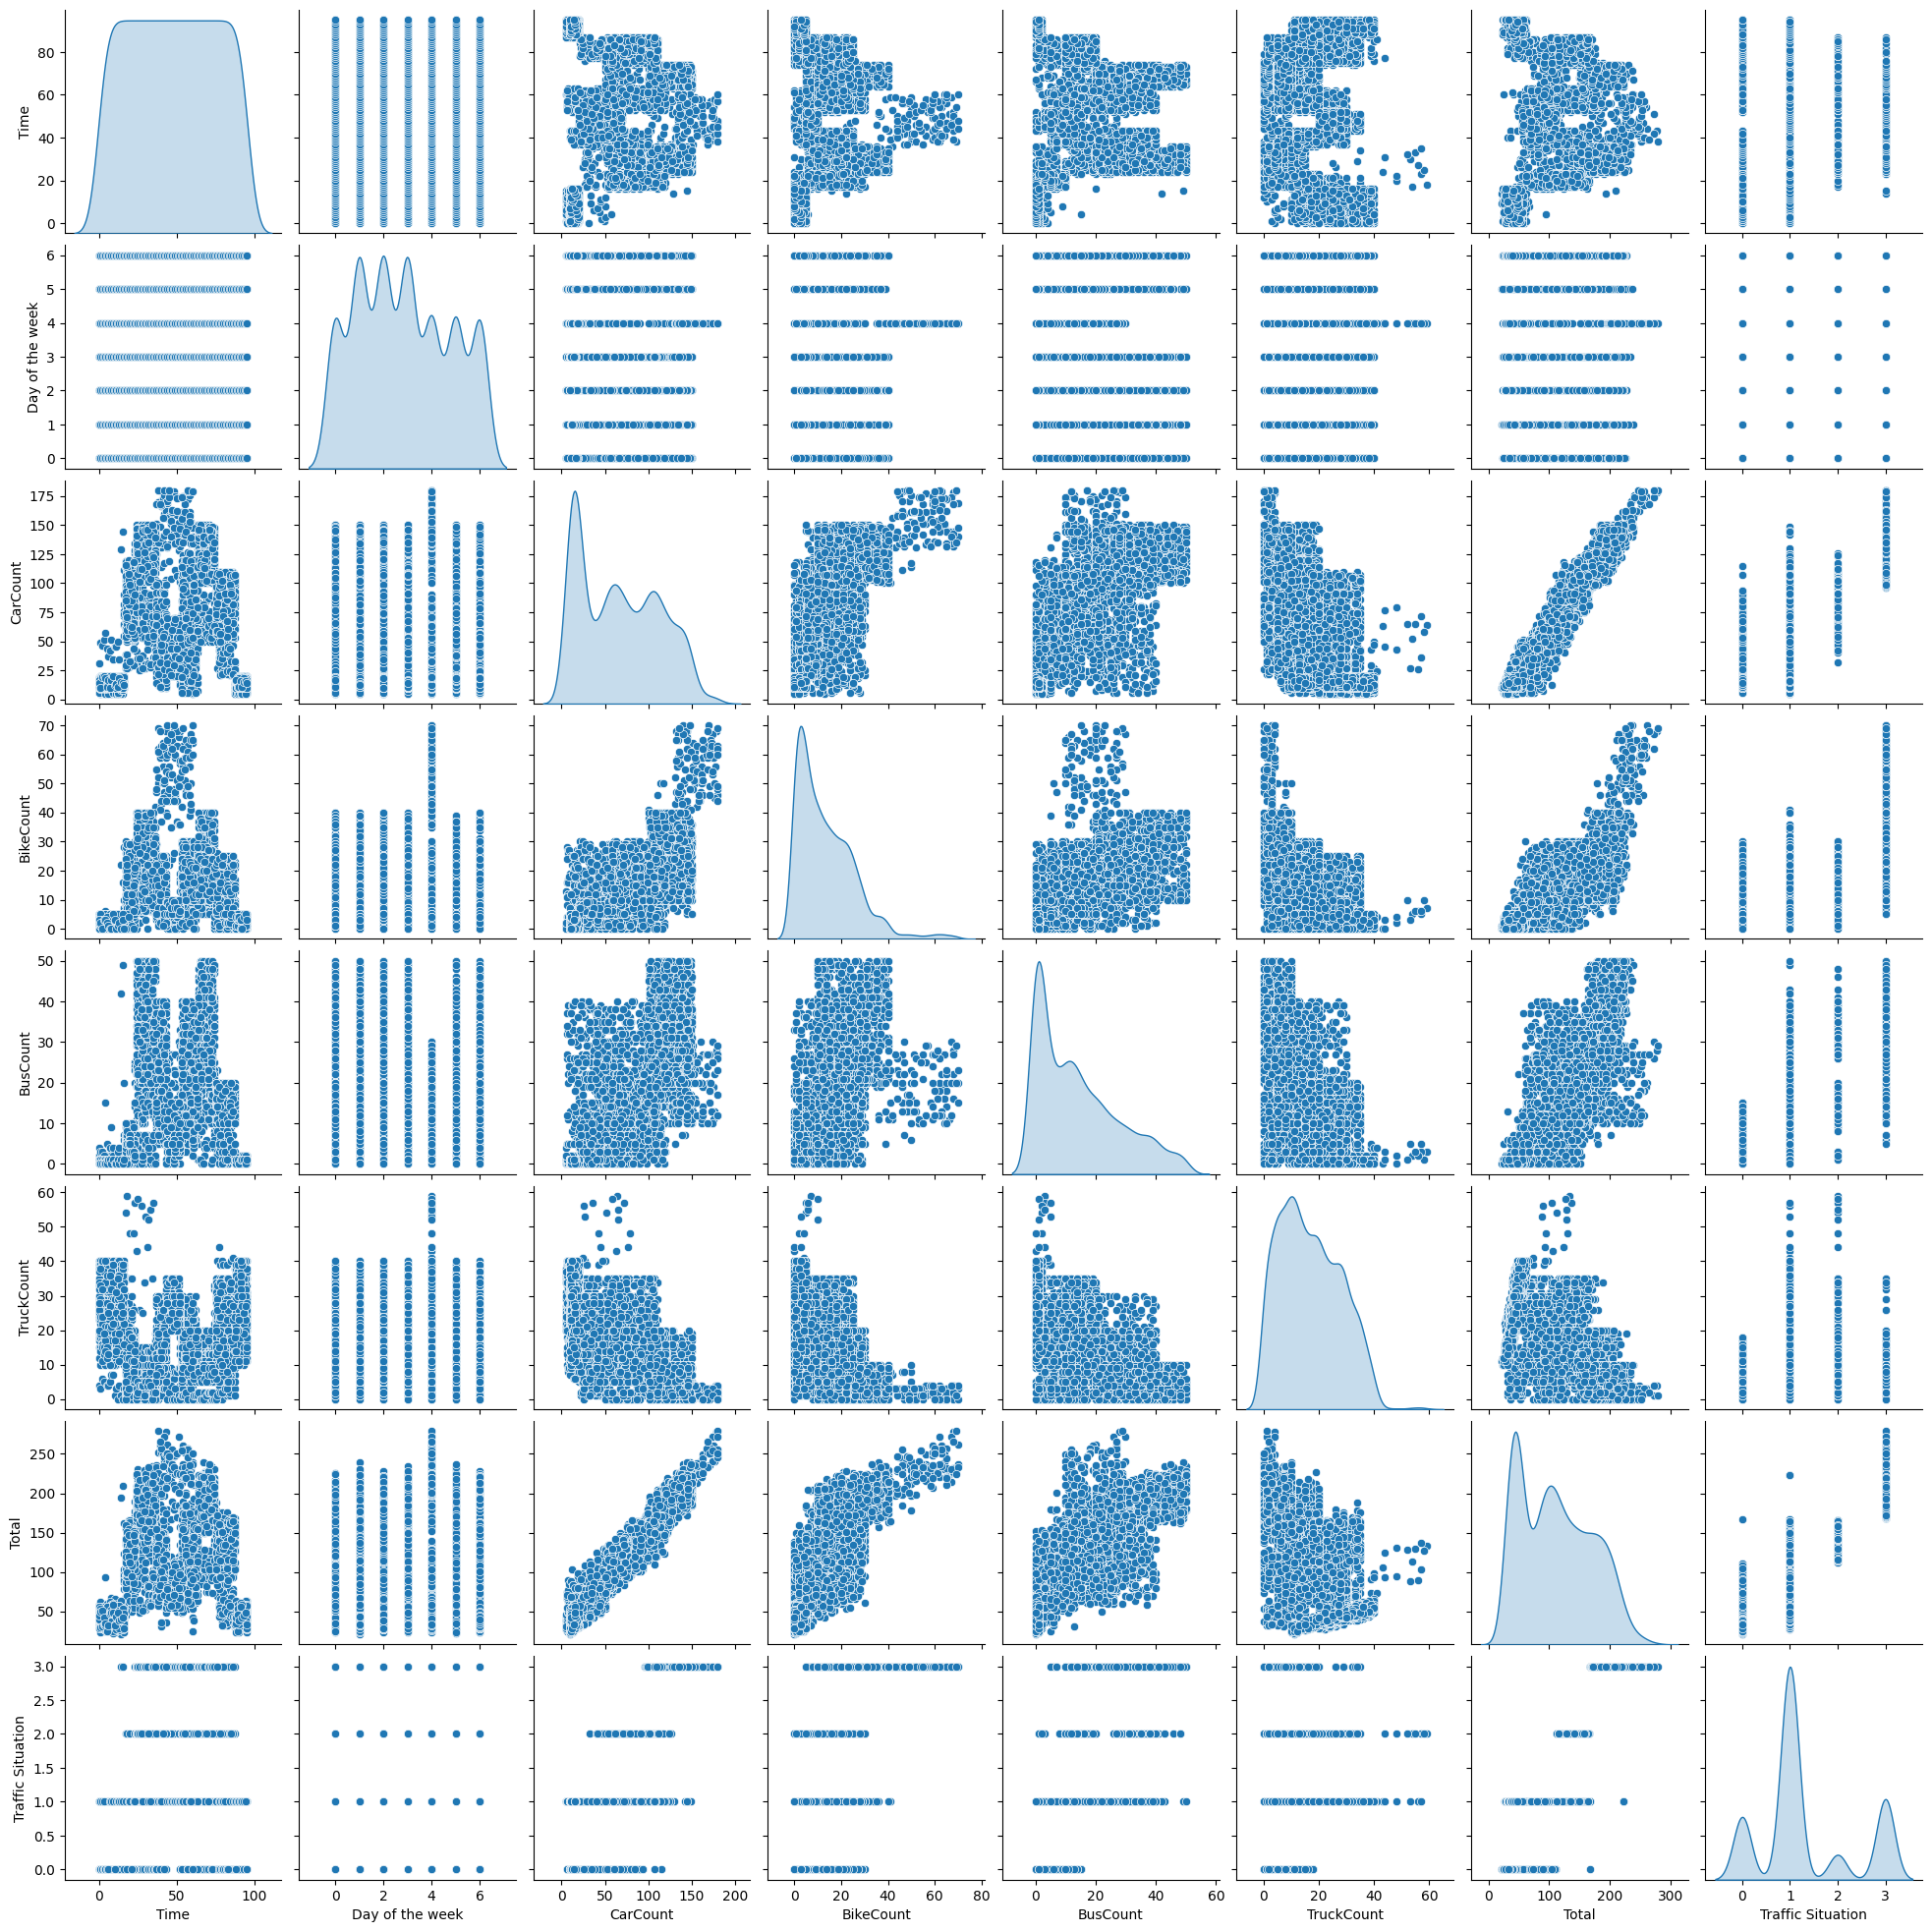

In [29]:
sns.pairplot(corr_data,diag_kind='kde')

## Heatmap

<Axes: >

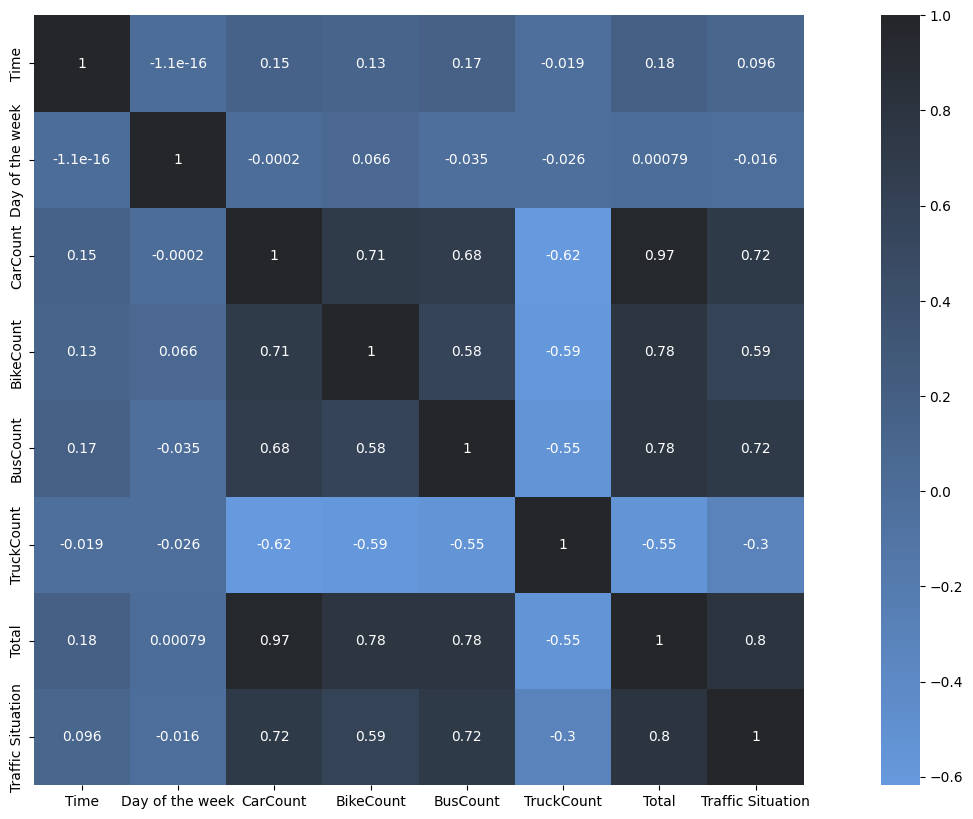

In [30]:
f, ax = plt.subplots(figsize=(20, 10))
corr = corr_data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)

# Random Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler

df = corr_data.copy()

# Initialize the RandomOverSampler
ros = RandomOverSampler()

# Perform the over-sampling
X = df.drop(columns=['Day of the week'])
y = df['Day of the week']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled X and y back into a DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)

df.head()

,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week
0,0,13,2,2,24,41,1,1
1,1,14,1,1,36,52,1,1
2,2,10,2,2,32,46,1,1
3,3,10,2,2,36,50,1,1
4,4,11,2,1,34,48,1,1


### Check the correctness of random oversampling

In [32]:
day_counts = df['Day of the week'].value_counts()

day_counts_df = day_counts.reset_index()
day_counts_df.columns = ['Day of the week', 'Number of Data Points']

# desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
desired_order = [0, 1, 2, 3, 4, 5, 6]

day_counts_df = day_counts_df.set_index('Day of the week').reindex(desired_order).reset_index()

day_counts_df['Number of Data Points'] = day_counts_df['Number of Data Points'].fillna(0).astype(int)

print(day_counts_df)

print(df.shape)
df.head()


   Day of the week  Number of Data Points
0                0                    672
1                1                    672
2                2                    672
3                3                    672
4                4                    672
5                5                    672
6                6                    672
(4704, 8)


,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week
0,0,13,2,2,24,41,1,1
1,1,14,1,1,36,52,1,1
2,2,10,2,2,32,46,1,1
3,3,10,2,2,36,50,1,1
4,4,11,2,1,34,48,1,1


# Model development

## Train, Test splitting

In [105]:
X = df[['Time', 'Day of the week', 'Traffic Situation']]
y = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]

print(X.shape)
print(y.shape)

X.head()
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4704, 3)
(4704, 4)

(3763, 3)
(3763, 4)
(941, 3)
(941, 4)


## Constructing the neural network

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

tf.random.set_seed(1234)  # For consistent results

model = Sequential(
    [               
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(3, 1), name="Conv1"),  # Conv1D layer
        Flatten(),  # Flatten to connect with Dense layers
        Dense(60, activation='relu', name="L1"), 
        Dense(45, activation='relu', name="L2"), 
        Dense(30, activation='relu', name="L3"), 
        Dense(20, activation='relu', name="L4"), 
        Dense(10, activation='relu', name="L5"),
        Dense(4, activation='linear', name="output")  
    ], name="my_model"
)

model.summary()

/Users/vidurayashan/Library/Mobile Documents/com~apple~CloudDocs/6thSem/CO326/DigitalTwinProject/CO326ProjectVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv1D)                  │ (None, 1, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 60)             │         1,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 45)             │         2,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 30)             │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L5 (Dense)                      │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,107 (27.76 KB)

 Trainable params: 7,107 (27.76 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [107]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 1353.4633
Epoch 2/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 514.3607
Epoch 3/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 304.3249
Epoch 4/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 270.2311
Epoch 5/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 253.4237
Epoch 6/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 244.9916
Epoch 7/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 237.4995
Epoch 8/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 231.1602
Epoch 9/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 226.5984
Epoch 10/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 223.1544
Epoch 11/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 220.1601
Epoch 12/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 217.8731
Epoch 13/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 215.9546
Epoch 14/1000
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [111]:
prediction = model.predict(X_test)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


In [112]:
print(type(prediction))

<class 'numpy.ndarray'>


In [113]:
print(prediction.shape)
print(y_test.shape)

(941, 4)
(941, 4)


In [114]:
from IPython.display import display, HTML

prediction_df = pd.DataFrame(prediction, columns=['Car_Predicted', 'Bike_Predicted', 'Bus_Predicted', 'Truck_Predicted'])
y_test = y_test.reset_index(drop=True)
print(type(prediction_df))
print(type(y_test))
result = pd.concat([prediction_df, y_test], axis=1)   

# Display as a scrollable table in Jupyter Notebook
display(HTML(result.to_html(classes='scrollable')))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Car_Predicted,Bike_Predicted,Bus_Predicted,Truck_Predicted,CarCount,BikeCount,BusCount,TruckCount
0,93.732414,15.784589,14.836670,18.210251,106,16,5,19
1,102.191521,15.557694,12.200520,9.124833,114,30,21,2
2,159.186890,55.527748,16.060797,3.039045,169,70,20,3
3,82.916023,15.304918,15.274448,15.504919,89,7,10,10
4,16.498541,3.968935,1.043042,14.288890,18,2,1,13
5,48.022930,11.399960,5.196007,11.665894,54,18,3,12
6,55.509335,10.013957,8.254536,20.977736,50,4,4,40
7,75.980782,14.043036,13.883917,16.357315,91,14,15,6
8,91.105377,13.011509,15.201586,17.626076,72,25,10,27
9,129.851273,23.198200,31.694235,10.095831,127,21,28,5
